David Diaz

INFX 562: Infoviz<br>
*Spring 2018*

## Antibiotics data

After the World War II, antibiotics were considered as "wonder drugs", since they were an easy remedy for what had been intractable ailments. To learn which drug worked most effectively for which bacterial infection, performance of the three most popular antibiotics on 16 bacteria were gathered.

The values in the table represent the minimum inhibitory concentration (MIC), a measure of the effectiveness of the antibiotic, which represents the concentration of antibiotic required to prevent growth in vitro. The reaction of the bacteria to Gram staining is described by the covariate “gram staining”. Bacteria that are stained dark blue or violet are Gram-positive. Otherwise, they are Gram-negative.

In [1]:
import pandas as pd
data = pd.read_csv('./antibiotics_data.csv')
data = data.sort_values(by=['Gram Staining','Bacteria'], ascending=[False,True])

In [2]:
data

,Bacteria,Penicilin,Streptomycin,Neomycin,Gram Staining
2,Brucella anthracis,0.001,0.01,0.007,positive
3,Diplococcus pneumoniae,0.005,11.00,10.000,positive
11,Staphylococcus albus,0.007,0.10,0.001,positive
12,Staphylococcus aureus,0.030,0.03,0.001,positive
13,Streptococcus fecalis,1.000,1.00,0.100,positive
14,Streptococcus hemolyticus,0.001,14.00,10.000,positive
15,Streptococcus viridans,0.005,10.00,40.000,positive
0,Aerobacter aerogenes,870.000,1.00,1.600,negative
1,Brucella abortus,1.000,2.00,0.020,negative
4,Escherichia coli,100.000,0.40,0.100,negative


## Assignment

Your task is to design a static (i.e., single image) visualization that you believe effectively communicates this data and provide a short write-up (no more than 4 paragraphs) describing your design. While you must use the data set given, note that you are free to transform and augment the data as you see fit to highlight the elements that you think are most important in the data set.

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story (or stories) are you trying to tell? Your goal is to create a visualization that supports comparison and discovery across the different data fields. However, you will likely find that any visualization design emphasizes some data more than others. Therefore, just as importantly, also note which aspects of the data might be obscured or down-played due to your visualization design.  Think carefully about the trade-offs between different possible designs, and try to find a design that minimizes information loss for the viewer.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

Be sure to include a short description of the tools you used to create the visualization.

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# convert to long-form dataframe
data = pd.melt(data, id_vars=['Bacteria', 'Gram Staining'], 
        value_vars=['Penicilin', 'Streptomycin', 'Neomycin'], 
        var_name='Antibiotic', value_name='MIC')

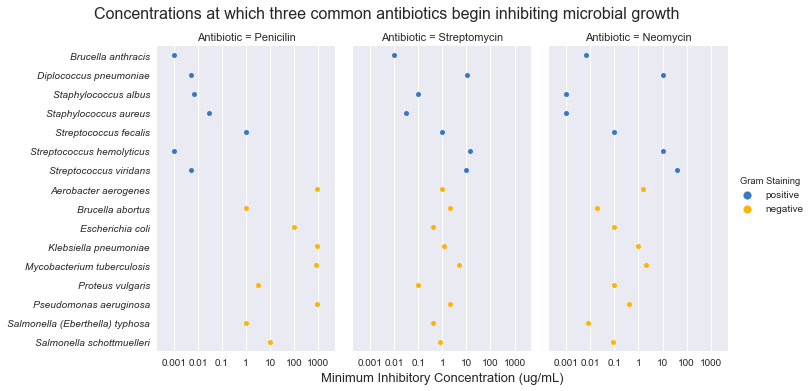

In [63]:
# use the seaborn "darkgrid" style
sns.set(style='darkgrid')

# XKCD colors
colors = ["windows blue", "amber"]

# create a seaborn factorplot
g = sns.factorplot(x='MIC', y='Bacteria', data=data, 
                   col="Antibiotic", hue="Gram Staining",
                   kind='strip', palette=sns.xkcd_palette(colors),
                   size=5.5, aspect=0.65,
                   sharex=True, sharey=False)

# show MIC using a logarithmic scale
g.fig.get_axes()[0].set_xscale('log') 

# define x-axis range
g.set(xlim=(0.0002, 5000)) 

# remove y-axis tick labels for center and right plots
for ax in g.fig.get_axes()[1:]: 
    ax.set_yticklabels([])
    
# convert from 10e-2, 10e0, 10e2 to decimal labels for x-axis
g.set(xticks=[0.001,0.01,0.1,1,10,100,1000])
g.set(xticklabels=['0.001', '0.01', '0.1', 1, '10', '100', '1000'])
    
# squeeze plots closer together
plt.subplots_adjust(wspace=0.1)

# Remove default x- and y-axis labels from plots 
g.set_axis_labels('', '')

# add x-axis label to center plot
g.fig.get_axes()[1].set_xlabel("Minimum Inhibitory Concentration (ug/mL)",
                              fontsize=13)

# make room for, then add, figure title
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Concentrations at which three common antibiotics begin inhibiting microbial growth',
               fontsize=16)

# show species names in italics
g.fig.get_axes()[0].set_yticklabels(labels=data.Bacteria, 
                                    style='italic')
plt.savefig('MIC for Antibiotics.png');

#### Data Emphases
In this visualization, I sought to illustrate MIC concentrations among the bacterial species for individual antibiotics, and highlighting that some antibiotics show clear differences in potency between Gram + and Gram - bacteria. 

I sought do obscure or downplay the comparison of MIC between antibiotics based on finding medical advice online discouraging such comparisons due to the need to consider dosage, type of infection, and delivery aspects/proximity of antibiotic to the bacteria. I obscured the between-antibiotic comparisons by using small multiples, with each graph showing a separate antibiotic, and the quantitative data (x-axis) arranged horizontally in the same direction as the row of the three graphs (e.g., rather than arranging these graphs in a single column). 

#### Encoding
* Bacterial species is a categorical variable and encoded as italicized text along the y-axis of the left-most graph. They were sorted to be in the same order for each graph. 
* Gram +/- aspect of each bacterium is a categorical variable encoded using color, and sorted vertically to make each category more visually distinct.
* Antibiotic is a categorical variable encoded as text along the titles of each graph, as well as through position in terms of the use of three separate graphs. The title of each graph includes the word "Antibiotic = ..." to clearly identify the three antibiotics mentioned in the overarching Figure title.
* MIC is a quantitative variable encoded using location of points along the horizontal axis. These data are shown using a log-scale to better capture the wide range of concentrations in a smaller area than could be done using a non-transformed scale. I changed the tick labels for MIC from exponentiated 10's to floats with the expectation that this formatting is less technical and easier to understand by a more general audience. The use of a log scale (without zero on the axis) required me to utilize points to indicate MIC, rather than bars, which might also seem to be a logical choice. 
* An overarching figure title was created with a description of the data being displayed in plain English.
* A gray background grid was used to allow the MIC points to 'pop' visually moreso than would be the case from a white background. 

#### Tools used
This graphic was developed using the Python graphing packages Seaborn and Matplotlib. Data were read from the text file using the Pandas package and transformed into a long-form dataframe (values of MIC for each antibiotic were 'un-pivoted'). The graphic was designed in a Jupyter Notebook and code for reproducing it is available on GitHub. 